C:\Users\artkl\AppData\Local\Temp\ipykernel_7896\238281182.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()  # show plot in notebook


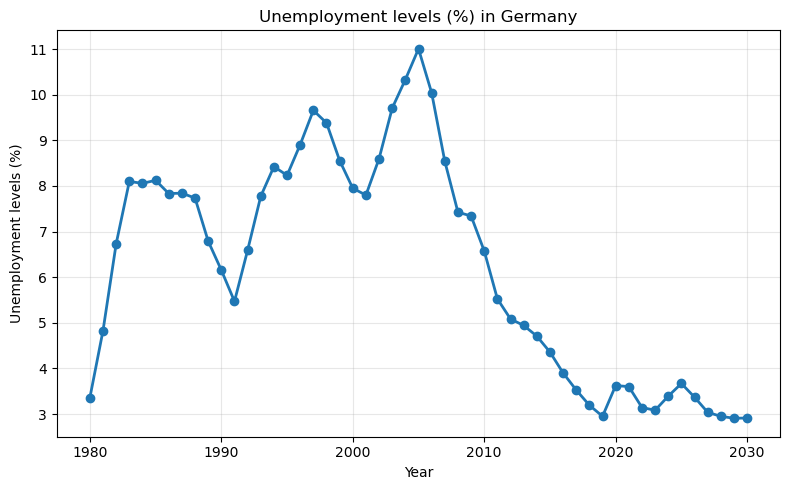

In [19]:

%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Add the Functions folder to Python path
sys.path.append("../Functions")  

from functions import filter_data, plot_indicator


df_url = "https://docs.google.com/spreadsheets/d/1E0lyCSxlC0ajNtzjpWo17TX5DEeEjd33E-j6c7fOBcg/export?format=csv"
df = pd.read_csv(df_url)
df.columns = [c.strip() for c in df.columns]

# ----------------------------
# Filter and plot germany
# ----------------------------
df_germany_unemp = filter_data(df, "Germany", "Unemployment levels (%)")
fig = plot_indicator(df_germany_unemp, "Germany", "Unemployment levels (%)")
fig.show()  # show plot in notebook






C:\Users\artkl\AppData\Local\Temp\ipykernel_7896\1348124582.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


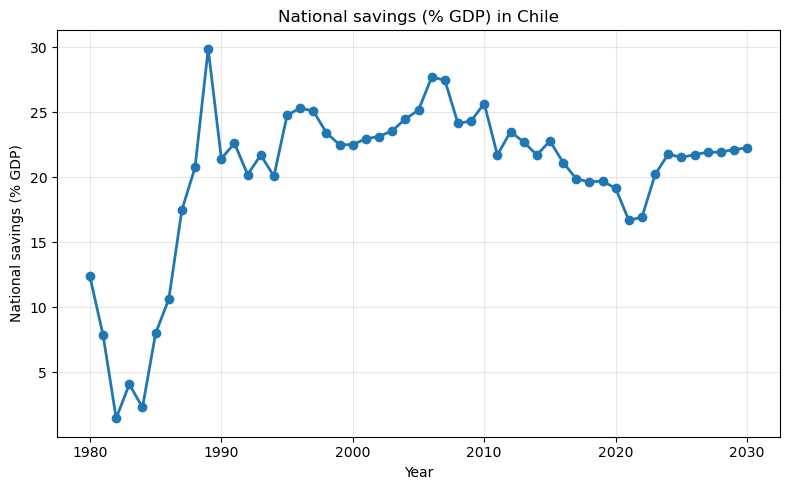

In [13]:
df_chile_savings = filter_data(df, "Chile", "National savings (% GDP)")
fig = plot_indicator(df_chile_savings, "Chile", "National savings (% GDP)")
fig.show()

In [15]:
df["Indicator Name"].unique

<bound method Series.unique of 0                   National savings (% GDP)
1                    Unemployment levels (%)
2                        Inflation (CPI, %))
3                    Unemployment levels (%)
4                        Inflation (CPI, %))
                        ...                 
3598    Birth rate, crude (per 1,000 people)
3599    Birth rate, crude (per 1,000 people)
3600    Birth rate, crude (per 1,000 people)
3601    Birth rate, crude (per 1,000 people)
3602    Birth rate, crude (per 1,000 people)
Name: Indicator Name, Length: 3603, dtype: object>

In [ ]:
filtered_data = filter_data(df, "Chile", "National savings (% GDP)")

def plot_indicator(df_filtered, country, indicator):
    """
    Creates a line plot from a filtered dataframe.
    Returns a Matplotlib figure object.
    Works in both Jupyter and Streamlit.
    """
    fig, ax = plt.subplots(figsize=(8, 5))

    if df_filtered.empty:
        ax.text(0.5, 0.5, "No data available",
                ha="center", va="center", fontsize=12)
        ax.set_axis_off()
        return fig

    ax.plot(df_filtered["Year"], df_filtered["Value"], marker="o", linewidth=2)
    ax.set_title(f"{indicator} in {country}")
    ax.set_xlabel("Year")
    ax.set_ylabel(indicator)
    ax.grid(alpha=0.3)

    plt.tight_layout()
    return fig